# extracting data from the gps tracker images

In [92]:
lines

['1:414 Pom 77]',
 '',
 '< My Trips Trip S)',
 '',
 '03 Apr 2024 Long Trip',
 '',
 'Time Summary',
 '',
 '01 hO5m55s',
 '',
 'Distance',
 '',
 '53.8mile',
 '',
 'Travel Time Max. Speed',
 '',
 '01 n05m23s Sach',
 '',
 'Stopped Time Avg Speed',
 '',
 '00,,32; 49 Omph',
 '',
 'Max. Altitude Avg Altitude',
 '',
 '15278 920:',
 '',
 'Map & Graphs',
 '',
 '> %',
 '',
 'Trip Log Trip Settings',
 '']

In [1]:
import tkinter as tk
from tkinter import filedialog
import cv2
import pytesseract
import pandas as pd
from PIL import Image
import re
import os

# Setting the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

def process_image(image_path):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image, lang='eng', config='--psm 6')
    return text

# Function to correct the speed format after the semicolon
def correct_speed_format(text):
    # Find the part of the text that matches the pattern after the semicolon
    match = re.search(r';\s*([\d\s.,]+)\s*', text, re.IGNORECASE)
    if match:
        # Extract the numeric part and clean it
        speed = match.group(1).replace(',', '.').replace(' ', '.')
        # Return only the corrected speed with "mph"
        return f'{speed} mph'
    return text

def process_lines(lines):
    # Initialize the dictionary
    data_dict = {'Avg Speed': '', 'Distance': ''}

    # Iterate through the list to find the element containing "mile" and "mpn"
    for element in lines:
        if 'mile' in element.lower():
            data_dict['Distance'] = element

        if 'mpn' in element.lower() or 'mph' in element.lower():
            corrected_speed = correct_speed_format(element)
            data_dict['Avg Speed'] = corrected_speed

    return data_dict

def process_text(ocr_text, lines):
    # Process the lines to find Distance and Avg Speed
    data_dict = process_lines(lines)

    # Regex patterns to extract other relevant data
    patterns = {
        "Time Summary": r"Time Summary\s*([\d\w\s]+?)(?=\n|$)",
        "Max Altitude": r"Max Altitude\s*([\d,]+)",
        "Avg Altitude": r"Avg Altitude\s*([\d,]+)"
    }

    # Extracting and cleaning the data
    extracted_data = {}
    for key, pattern in patterns.items():
        # Search using the pattern
        match = re.search(pattern, ocr_text, re.IGNORECASE)
        if match:
            value = match.group(1).strip()
            if key in ["Max Altitude", "Avg Altitude"]:
                value = value.replace(":", "").strip() + " ft"  # Correct format and OCR error
            extracted_data[key] = value

    # Merge the dictionaries
    extracted_data.update(data_dict)

    # Further process for elevation gain
    pattern = r"Avg Altitude\s*([\d,]+)\s*:\s*([\d,]+)"
    match = re.search(pattern, ocr_text, re.IGNORECASE)
    if match:
        avg_altitude_first = match.group(1).replace(',', '').strip()
        avg_altitude_next = match.group(2).replace(',', '').strip()
        extracted_data['Avg Altitude'] = avg_altitude_next + " ft"
        extracted_data["Elevation Gain"] = str(int(avg_altitude_next.replace(" ft", "")) - int(avg_altitude_first.replace(" ft", ""))) + " ft"

    return extracted_data

# DataFrame to store all data cumulatively
cumulative_data_df = pd.DataFrame()

def upload_action():
    file_paths = filedialog.askopenfilenames()
    global cumulative_data_df
    for path in file_paths:
        text = process_image(path)
        lines = text.split('\n')
        data = process_text(text, lines)
        data['Image'] = os.path.basename(path)
        cumulative_data_df = cumulative_data_df.append(data, ignore_index=True)
    
    result_text.delete('1.0', tk.END)  # Clear existing text
    result_text.insert(tk.END, cumulative_data_df.to_string(index=False))  # Display dataframe as string in text widget

def save_csv():
    save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")])
    if save_path:
        global cumulative_data_df
        cumulative_data_df.to_csv(save_path, index=False)
        print(f"Data saved to {save_path}")
        cumulative_data_df = pd.DataFrame()  # Reset DataFrame after saving

root = tk.Tk()
root.title("EV_IMAGE_TEXT_Extractor")

# Button to upload images
upload_btn = tk.Button(root, text="Upload Images", command=upload_action)
upload_btn.pack()

# Button to save CSV
save_btn = tk.Button(root, text="Save CSV", command=save_csv)
save_btn.pack()

# Text widget to display results
result_text = tk.Text(root, height=20, width=80)
result_text.pack()

root.mainloop()


C:\Users\msikh\AppData\Local\Temp\ipykernel_1256\3314185937.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cumulative_data_df = cumulative_data_df.append(data, ignore_index=True)
C:\Users\msikh\AppData\Local\Temp\ipykernel_1256\3314185937.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cumulative_data_df = cumulative_data_df.append(data, ignore_index=True)
C:\Users\msikh\AppData\Local\Temp\ipykernel_1256\3314185937.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cumulative_data_df = cumulative_data_df.append(data, ignore_index=True)
C:\Users\msikh\AppData\Local\Temp\ipykernel_1256\3314185937.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

Data saved to C:/Users/msikh/EV_Project/EV_Discharging_Data/NEUTC/EV Trip Data/Data_2/GPS App/Data_EV_trip_GPS_APP.csv


In [94]:
lines
# Initialize the dictionary
data_dict = {'Avg Speed': '',"Distance":""}
# Initialize the dictionary
data_dict = {'Avg Speed': '', 'Distance': ''}

# Function to correct the speed format after the semicolon
def correct_speed_format(text):
    # Find the part of the text that matches the pattern after the semicolon
    match = re.search(r';\s*([\d\s.,]+)\s*', text, re.IGNORECASE)
    if match:
        # Extract the numeric part and clean it
        speed = match.group(1).replace(',', '.').replace(' ', '.')
        # Replace the original part with the corrected format
        corrected_text = f"{speed} mph"
        return corrected_text
    return text

# Iterate through the list to find the element containing "mile" and "mpn"
for element in lines:
    if 'mile' in element.lower():
        data_dict['Distance'] = element
        
    if 'mpn' in element.lower() or 'mph' in element.lower():
        corrected_element = correct_speed_format(element)
        data_dict['Avg Speed'] = corrected_element

# Print the dictionary
print(data_dict)

{'Avg Speed': '49. mph', 'Distance': '53.8mile'}


In [95]:
import pandas as pd
import re
# Path to the Tesseract-OCR executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
# Load the image
image_path = '040324A.png'
image = Image.open(image_path)

# Perform OCR on the image
text = pytesseract.image_to_string(image, lang='eng')

# Process the extracted text to get the relevant data
lines = text.split(' ')

def process_text(ocr_text,lines):
    # Regex patterns to extract relevant data
    patterns = {
        "Time Summary": r"Time Summary\s*([\d\w\s]+?)(?=\n|$)",
        "Distance": r"Distance\s*([\d\.]+\s*[a-zA-Z]+)+mile",
        "Avg Speed": r"Avg Speed\s*([\d\.]+\s*[a-zA-Z]+)",
        "Max Altitude": r"Avg Altitude\s*([\d,]+)",
        "Avg Speed": r"Avg Speed\s*([\d\w\s:.]+?)(?=\n|$)",
        "Avg Altitude": r"Avg Altitude\s*([\d,]+)"
    }

    # Extracting and cleaning the data
    extracted_data = {}
    for key, pattern in patterns.items():
        # Search using the pattern
        match = re.search(pattern, ocr_text, re.IGNORECASE)
        if match:
            value = match.group(1).strip()
            #if key == "Avg Speed":
                #value = re.sub(r"^\d+\.\d+\s*", "", value)  # Remove unwanted prefix numbers
                #value = value.replace("Sinpn", "mph").replace(" ", ".").replace("..", "")
            if key in ["Max Altitude", "Avg Altitude"]:
                value = value.replace(":", "").strip() + " ft"  # Correct format and OCR error
            extracted_data[key] = value

    # Further process for elevation gain
    pattern = r"Avg Altitude\s*([\d,]+)\s*:\s*([\d,]+)"
    match = re.search(pattern, ocr_text, re.IGNORECASE)
    if match:
        avg_altitude_first = match.group(1).replace(',', '').strip()
        avg_altitude_next = match.group(2).replace(',', '').strip()
        extracted_data['Avg Altitude'] = avg_altitude_next + " ft"
        extracted_data["Elevation Gain"] = str(int(avg_altitude_next.replace(" ft", "")) - int(avg_altitude_first.replace(" ft", ""))) + " ft"

    return extracted_data

data = process_text(text,lines)

# Show the DataFrame
print(data)


{'Time Summary': '01 hO7m27s', 'Avg Speed': '', 'Max Altitude': '1,590 ft', 'Avg Altitude': '938 ft', 'Elevation Gain': '-652 ft'}


In [97]:
import pandas as pd
import re
import pytesseract
from PIL import Image

# Path to the Tesseract-OCR executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load the image
image_path = '040324B-Copy1.PNG'
image = Image.open(image_path)

# Perform OCR on the image
text = pytesseract.image_to_string(image, lang='eng')

# Split the text into lines
lines = text.split('\n')

# Function to correct the speed format after the semicolon
def correct_speed_format(text):
    # Find the part of the text that matches the pattern after the semicolon
    match = re.search(r';\s*([\d\s.,]+)\s*', text, re.IGNORECASE)
    if match:
        # Extract the numeric part and clean it
        speed = match.group(1).replace(',', '.').replace(' ', '.')
        # Return only the corrected speed with "mph"
        return f'{speed} mph'
    return text

def process_lines(lines):
    # Initialize the dictionary
    data_dict = {'Avg Speed': '', 'Distance': ''}

    # Iterate through the list to find the element containing "mile" and "mpn"
    for element in lines:
        if 'mile' in element.lower():
            data_dict['Distance'] = element

        if 'mpn' in element.lower() or 'mph' in element.lower():
            corrected_speed = correct_speed_format(element)
            data_dict['Avg Speed'] = corrected_speed

    return data_dict

def process_text(ocr_text, lines):
    # Process the lines to find Distance and Avg Speed
    data_dict = process_lines(lines)

    # Regex patterns to extract other relevant data
    patterns = {
        "Time Summary": r"Time Summary\s*([\d\w\s]+?)(?=\n|$)",
        "Max Altitude": r"Max Altitude\s*([\d,]+)",
        "Avg Altitude": r"Avg Altitude\s*([\d,]+)"
    }

    # Extracting and cleaning the data
    extracted_data = {}
    for key, pattern in patterns.items():
        # Search using the pattern
        match = re.search(pattern, ocr_text, re.IGNORECASE)
        if match:
            value = match.group(1).strip()
            if key in ["Max Altitude", "Avg Altitude"]:
                value = value.replace(":", "").strip() + " ft"  # Correct format and OCR error
            extracted_data[key] = value

    # Merge the dictionaries
    extracted_data.update(data_dict)

    # Further process for elevation gain
    pattern = r"Avg Altitude\s*([\d,]+)\s*:\s*([\d,]+)"
    match = re.search(pattern, ocr_text, re.IGNORECASE)
    if match:
        avg_altitude_first = match.group(1).replace(',', '').strip()
        avg_altitude_next = match.group(2).replace(',', '').strip()
        extracted_data['Avg Altitude'] = avg_altitude_next + " ft"
        extracted_data["Elevation Gain"] = str(int(avg_altitude_next.replace(" ft", "")) - int(avg_altitude_first.replace(" ft", ""))) + " ft"

    return extracted_data

# Process the OCR text and lines
data = process_text(text, lines)

# Show the DataFrame
print(data)


{'Time Summary': '01 hO5m55s', 'Avg Altitude': '15278 ft', 'Avg Speed': '49. mph', 'Distance': '53.8mile'}


# Processing the csv file extracted from the gps tracker

In [1]:
import pandas as pd
import re

# Load the CSV file
file_path = r'C:\Users\msikh\EV_Project\EV_Discharging_Data\NEUTC\EV Trip Data\Data_2\GPS App\Data_EV_trip_GPS_APP.csv'  # Replace with actual file path
Data_EV_trip_GPS_APP = pd.read_csv(file_path)

def extract_date_and_letter(trip_name):
    match = re.match(r"(\d{2})(\d{2})(\d{2})([A-Z])", trip_name)
    if match:
        day, month, year, letter = match.groups()
        date = f"20{year}-{month}-{day}"
        return date, letter
    return trip_name, ''

# Process the 'Trip Name' column
if 'Trip Name' in Data_EV_trip_GPS_APP.columns:
    Data_EV_trip_GPS_APP['Date'], Data_EV_trip_GPS_APP['Letter'] = zip(*Data_EV_trip_GPS_APP['Trip Name'].apply(extract_date_and_letter))
    Data_EV_trip_GPS_APP.drop(columns=['Trip Name'], inplace=True)
# Function to separate values and units
def extract_value_and_unit(text):
    if isinstance(text, str):
        match = re.match(r"([0-9.,]+)\s*([a-zA-Z]+)", text)
        if match:
            return match.groups()
    return text, ''

# List of columns to process
columns_to_process = ['Avg Speed', 'Avg Altitude', 'Distance']  # Adjust these column names as needed

# Process columns and update column names with units
for column in columns_to_process:
    if column in Data_EV_trip_GPS_APP.columns:
        Data_EV_trip_GPS_APP[column], units = zip(*Data_EV_trip_GPS_APP[column].apply(extract_value_and_unit))
        if units and units[0]:  # Ensure there is at least one unit detected
            unit = units[0]
            Data_EV_trip_GPS_APP.rename(columns={column: f"{column} ({unit})"}, inplace=True)

Data_EV_trip_GPS_APP

           Image Temperature
0  040124B1.jpeg         34°
1  040224A1.jpeg         29°
2  040324A1.jpeg         36°
3  040324B1.jpeg         41°
4  040424A1.jpeg         31°


NameError: name 'Data_EV_trip_GPS_APP' is not defined

# Processing Apple WAtches images:

In [135]:
img_apple = Image.open("040324B.jpeg")
img_apple2 = Image.open("040224A_APPle.jpeg")
apple_text = pytesseract.image_to_string(img_apple)
apple_text_2=pytesseract.image_to_string(img_apple2)
lines_apple=apple_text.split("\n")
lines_apple_2=apple_text_2.split("\n")
print(lines_apple)
print(lines_apple_2)

# List of keywords to remove
keywords = ["Calories", "Workout Detail", "Open Goal","History","Bristol","Outdoor","AM"]

# Function to check if an element should be removed
def should_remove(element):
    if element == '':
        return True
    for keyword in keywords:
        if re.search(keyword, element, re.IGNORECASE):
            return True
    return False

# Filter the list
filtered_lines_apple = [element for element in lines_apple_2 if not should_remove(element)]

# Display the filtered list
print(filtered_lines_apple)

# Initialize the dictionary to store the extracted values
extracted_data = {}

def extract_value(text, unit):
    match = re.search(rf'([0-9.,a-zA-Z]+)\s*{unit}', text, re.IGNORECASE)
    if match:
        return match.group(1)
    return None

# Extract the distance
for element in filtered_lines_apple:
    distance = extract_value(element, 'MI')
    if distance:
        extracted_data['Distance'] = f'{distance} miles'
        break

# Extract the average speed
for element in filtered_lines_apple:
    avg_speed = extract_value(element, 'MPH')
    if avg_speed:
        extracted_data['Avg Speed'] = f'{avg_speed} mph'
        break

# Extract the elevation gain
for element in filtered_lines_apple:
    elevation_gain = extract_value(element, 'FT')
    if elevation_gain:
        extracted_data['Elevation Gain'] = f'{elevation_gain} ft'
        break

# Extract the time summary
for element in filtered_lines_apple:
    match = re.search(r'\b(\d{1,2}:\d{2}:\d{2})\b', element)
    if match:
        extracted_data['Time Summary'] = match.group(1)
        break

# Display the extracted data
print(extracted_data)

['< History Wed, Apr 3 (4', '', 'Outdoor Cycle', 'x. Open Goal', '', 'O O 8:17 AM-9:27 AM', '', '4 Bristol', '', 'Workout Details Show More', '', 'Workout Time Elapsed Time', '1:05:42 1:10:11', 'Distance Active Calories', '53.89MI 196CAL', 'Total Calories Elevation Gain', '309CAL 3,077FT', 'Avg. Speed', '', '49.2MPH', '']
['< History Tue, Apr 2 (4', '', 'Outdoor Cycle', 'x Open Goal', '', 'O O 7:02 AM-8:07 AM', '', '4 Bristol', '', 'Workout Details Show More', '', 'Workout Time Distance', '1:05:37 54.01mMI', 'Active Calories Total Calories', '201CAL 316CAL', 'Elevation Gain Avg. Speed', '', '2,966FT 49.3MPH', '']
['Workout Time Distance', '1:05:37 54.01mMI', '201CAL 316CAL', 'Elevation Gain Avg. Speed', '2,966FT 49.3MPH']
{'Distance': '54.01m miles', 'Avg Speed': '49.3 mph', 'Elevation Gain': '2,966 ft', 'Time Summary': '1:05:37'}


In [2]:
import tkinter as tk
from tkinter import filedialog
import pytesseract
import pandas as pd
from PIL import Image
import re
import os

# Setting the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Function to process the image and extract text
def process_image(image_path):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image, lang='eng')
    return text

# List of keywords to remove
keywords = ["Calories", "Workout Detail", "Open Goal", "History", "Bristol", "Outdoor", "AM"]

# Function to check if an element should be removed
def should_remove(element):
    if element == '':
        return True
    for keyword in keywords:
        if re.search(keyword, element, re.IGNORECASE):
            return True
    return False

# Function to extract the value before a unit (handles numbers and letters)
def extract_value(text, unit):
    match = re.search(rf'([0-9.,a-zA-Z]+)\s*{unit}', text, re.IGNORECASE)
    if match:
        return match.group(1)
    return None

# Function to process text and extract relevant data
def process_text(ocr_text):
    lines = ocr_text.split("\n")
    filtered_lines = [element for element in lines if not should_remove(element)]

    # Initialize the dictionary to store the extracted values
    extracted_data = {}
    
    # Extract the time summary
    for element in filtered_lines:
        match = re.search(r'\b(\d{1,2}:\d{2}:\d{2})\b', element)
        if match:
            extracted_data['Time Summary'] = match.group(1)
            break


    # Extract the elevation gain
    for element in filtered_lines:
        elevation_gain = extract_value(element, 'FT')
        if elevation_gain:
            extracted_data['Elevation Gain'] = f'{elevation_gain} ft'
            break
         # Extract the average speed
    for element in filtered_lines:
        avg_speed = extract_value(element, 'MPH')
        if avg_speed:
            extracted_data['Avg Speed'] = f'{avg_speed} mph'
            break
       
        # Extract the distance
    for element in filtered_lines:
        distance = extract_value(element, 'MI')
        if distance:
            extracted_data['Distance'] = f'{distance} miles'
            break
    return extracted_data

# DataFrame to store all data cumulatively
cumulative_data_df = pd.DataFrame()

def upload_action():
    file_paths = filedialog.askopenfilenames()
    global cumulative_data_df
    for path in file_paths:
        text = process_image(path)
        data = process_text(text)
        data['Trip Name'] = os.path.basename(path)
        cumulative_data_df = cumulative_data_df.append(data, ignore_index=True)
    
    result_text.delete('1.0', tk.END)  # Clear existing text
    result_text.insert(tk.END, cumulative_data_df.to_string(index=False))  # Display dataframe as string in text widget

def save_csv():
    save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")])
    if save_path:
        global cumulative_data_df
        cumulative_data_df.to_csv(save_path, index=False)
        print(f"Data saved to {save_path}")
        cumulative_data_df = pd.DataFrame()  # Reset DataFrame after saving

root = tk.Tk()
root.title("EV_IMAGE_TEXT_Extractor")

# Button to upload images
upload_btn = tk.Button(root, text="Upload Images", command=upload_action)
upload_btn.pack()

# Button to save CSV
save_btn = tk.Button(root, text="Save CSV", command=save_csv)
save_btn.pack()

# Text widget to display results
result_text = tk.Text(root, height=20, width=80)
result_text.pack()

root.mainloop()


C:\Users\msikh\AppData\Local\Temp\ipykernel_1256\1321971793.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cumulative_data_df = cumulative_data_df.append(data, ignore_index=True)
C:\Users\msikh\AppData\Local\Temp\ipykernel_1256\1321971793.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cumulative_data_df = cumulative_data_df.append(data, ignore_index=True)
C:\Users\msikh\AppData\Local\Temp\ipykernel_1256\1321971793.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cumulative_data_df = cumulative_data_df.append(data, ignore_index=True)
C:\Users\msikh\AppData\Local\Temp\ipykernel_1256\1321971793.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

Data saved to C:/Users/msikh/EV_Project/EV_Discharging_Data/NEUTC/EV Trip Data/Data_2/Apple Watch/Data_EV_trip_Apple_Watch.csv


# Processing the Apple watch CSV file

In [9]:
import pandas as pd
import re

# Load the CSV file
file_path = r'C:\Users\msikh\EV_Project\EV_Discharging_Data\NEUTC\EV Trip Data\Data_2\Apple Watch\Data_EV_trip_Apple_Watch.csv'  # Replace with actual file path
Data_EV_trip_Apple = pd.read_csv(file_path)

def extract_date_and_letter(trip_name):
    match = re.match(r"(\d{2})(\d{2})(\d{2})([A-Z])", trip_name)
    if match:
        day, month, year, letter = match.groups()
        date = f"20{year}-{month}-{day}"
        return date, letter
    return trip_name, ''

# Process the 'Trip Name' column
if 'Trip Name' in Data_EV_trip_Apple.columns:
    Data_EV_trip_Apple['Date'], Data_EV_trip_Apple['Letter'] = zip(*Data_EV_trip_Apple['Trip Name'].apply(extract_date_and_letter))
    Data_EV_trip_Apple.drop(columns=['Trip Name'], inplace=True)
# Function to separate values and units
def extract_value_and_unit(text):
    if isinstance(text, str):
        match = re.match(r"([0-9.,]+)\s*([a-zA-Z]+)", text)
        if match:
            return match.groups()
    return text, ''

# List of columns to process
columns_to_process = ['Avg Speed', 'Elevation Gain', 'Distance']  # Adjust these column names as needed

# Process columns and update column names with units
for column in columns_to_process:
    if column in Data_EV_trip_Apple.columns:
        Data_EV_trip_Apple[column], units = zip(*Data_EV_trip_Apple[column].apply(extract_value_and_unit))
        if units and units[0]:  # Ensure there is at least one unit detected
            unit = units[0]
            Data_EV_trip_Apple.rename(columns={column: f"{column} ({unit})"}, inplace=True)

print(Data_EV_trip_Apple)
#Data_EV_trip_Apple.to_csv("Data_EV_trip_Apple_Full.csv")
Data_EV_trip_GPS_APP.to_csv("Data_EV_GPS_App_Full.csv")

   Time Summary Elevation Gain (ft) Avg Speed (mph) Distance (miles)  \
0       1:06:46               2,996            48.2            53.65   
1       1:03:20               3,149            53.5            56.52   
2       1:08:02               2,847            47.6            54.04   
3       1:05:43               2,968            49.3            54.03   
4       1:06:38               2,900            48.6            54.00   
5       1:09:41               2,961            46.1            53.57   
6       1:10:14               2,766            46.1            54.05   
7       1:07:24               3,162            50.5            56.82   
8       1:04:38               2,819            50.1            54.07   
9       1:08:44               3,105            49.5            56.74   
10      1:06:07               3,056            51.8            57.18   
11      1:02:21               3,060            50.2            52.22   
12      1:30:16               3,033            39.4            5

# Plots comparison

In [6]:
merged_data

NameError: name 'merged_data' is not defined

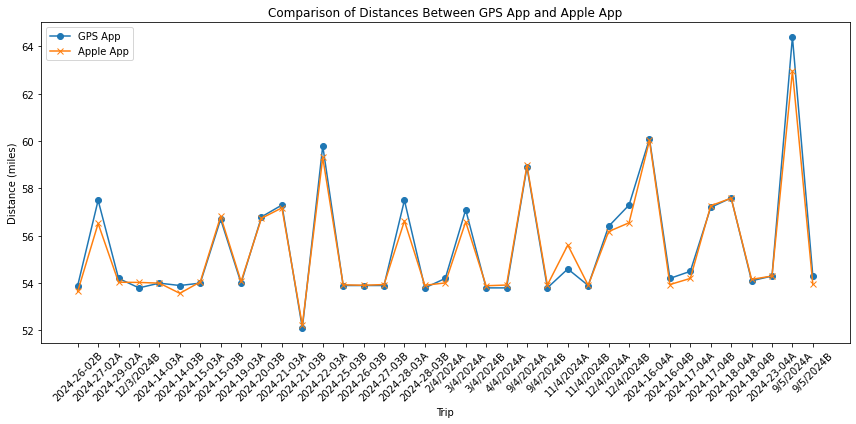

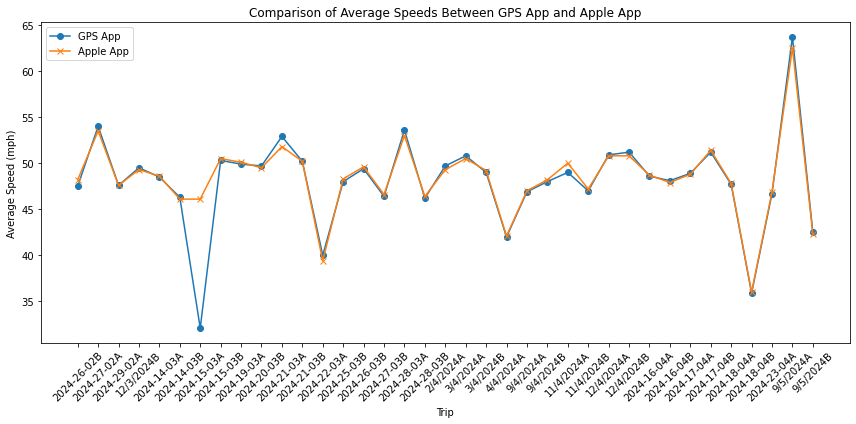

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the two CSV files
file_path_gps = 'Data_EV_GPS_App_Full.csv'  # Replace with actual file path
file_path_apple = 'Data_EV_trip_Apple.csv'  # Replace with actual file path

data_gps = pd.read_csv(file_path_gps)
data_apple = pd.read_csv(file_path_apple)

#Make sure everything is a float
data_gps['Avg Speed'] = pd.to_numeric(data_gps['Avg Speed'])
data_apple['Avg Speed'] = pd.to_numeric(data_apple['Avg Speed'])

# Merge data on Date and Letter for comparison
merged_data = pd.merge(data_gps, data_apple, on=['Date', 'Letter'], suffixes=('_GPS', '_Apple'))

# Plot comparison of distances
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'] + merged_data['Letter'], merged_data['Distance_GPS'], label='GPS App', marker='o')
plt.plot(merged_data['Date'] + merged_data['Letter'], merged_data['Distance_Apple'], label='Apple App', marker='x')
plt.xlabel('Trip')
plt.ylabel('Distance (miles)')
plt.title('Comparison of Distances Between GPS App and Apple App')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot comparison of average speeds
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'] + merged_data['Letter'], merged_data['Avg Speed_GPS'], label='GPS App', marker='o')
plt.plot(merged_data['Date'] + merged_data['Letter'], merged_data['Avg Speed_Apple'], label='Apple App', marker='x')
plt.xlabel('Trip')
plt.ylabel('Average Speed (mph)')
plt.title('Comparison of Average Speeds Between GPS App and Apple App')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
merged_data.to_csv("Data_EV_Full.csv")

# Temp Retrieval

In [163]:

# Load the image from the file
img = Image.open("052024A4.jpeg")

# Use pytesseract to do optical character recognition on the image
temp_text = pytesseract.image_to_string(img, lang='eng')

# Print the extracted text
temp_text
temp_lines=temp_text.split("\n")

for element in temp_lines:
    temperature = extract_value(element, '°F')
    if temperature:
        temp = f'{temperature} °F'
        break
temp

'80 °F'

# Energy data

In [10]:
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
# Load the image from the file
img = Image.open("Data_Energy_1.jpg")

# Use pytesseract to do optical character recognition on the image
Energy_text = pytesseract.image_to_string(img, lang='eng', config='--psm 6')

# Print the extracted text
Energy_text


'Since Last Charge Y Show in Trips Card\nDistance Total Energy Avg. Energy\n54 mi 13 kWh 244 Wh/mi\nTp A. Reset & show nTips Card =\nDistance Total Energy ‘Avg. Energy\n4omi WkWh 233 Wh/mi\nif Oa\nTripB Reset ‘of 2 © w showin inps card\nn Total/Energy Avg, Energy\n6. 17 kWh 264 Wh/mi\nOdometer : 63 mi show in Trips\\Card\n'

In [17]:
import re
# Regex patterns to extract relevant data
patterns = {
    "Distance": r"Energy\s*([\d\.]+\s*[a-zA-Z]+)",
    "Total Energy": r"mi\s*([\d\.]+\s*[a-zA-Z]+)",
    "Avg Energy": r"kWh\s*([\d\.]+\s*[a-zA-Z]+)"
}

# Extracting and cleaning the data
extracted_data = {}
for key, pattern in patterns.items():
    # Search using the pattern
    match = re.search(pattern, Energy_text, re.IGNORECASE)
    if match:
        value = match.group(1).strip()
#         if key == "Avg Speed":
#                 # Remove any unwanted prefix numbers followed by a period
#                 value = re.sub(r"^\d+\.\d+\s*", "", value)
#                 value= value.replace("Sinpn","mph")
#                 value= value.replace(" ",".")
#                 value= value.replace("..","")
#         if key in ["Max Altitude", "Avg Altitude"]:
#             value = value.replace(":", "").strip() + " ft"  # Correct format and OCR error ':'
        extracted_data[key] = value
# pattern = r"Avg Altitude\s*([\d,]+)\s*:\s*([\d,]+)"

# # Search using the pattern
# match = re.search(pattern, ocr_text, re.IGNORECASE)
# if match:
#     avg_altitude_first = match.group(1).replace(',', '').strip()   # Clean up first number
#     avg_altitude_next = match.group(2).replace(',', '').strip()  # Clean up second number

# # # Display the cleaned data
# extracted_data['Avg Altitude']= avg_altitude_next + " ft"
# extracted_data["Elevation Gain"]= str((int(avg_altitude_next) - int(avg_altitude_first) ))+ " ft"
# patterns_2
extracted_data
# for key, pattern in patterns_2.items():
#     # Search using the pattern
#     match = re.search(pattern, ocr_text, re.IGNORECASE)
#     extracted_data[2+key]

{'Distance': '54 mi', 'Total Energy': '13 kWh', 'Avg Energy': '244 Wh'}

In [60]:
import tkinter as tk
from tkinter import filedialog
import cv2
import pytesseract

# Setting the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

def process_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    invert = 255 - opening
    text = pytesseract.image_to_string(invert, lang='eng', config='--psm 6')
    return text

def upload_action():
    file_path = filedialog.askopenfilenames()
    extracted_texts = [process_image(path) for path in file_path]
    result_text.delete('1.0', tk.END)  # Clear existing text
    result_text.insert(tk.END, "\n\n".join(extracted_texts))

root = tk.Tk()
root.title("Image Text Extractor")

# Button to upload images
upload_btn = tk.Button(root, text="Upload Images", command=upload_action)
upload_btn.pack()

# Text widget to display results
result_text = tk.Text(root, height=20, width=80)
result_text.pack()

root.mainloop()


import re
import pandas as pd

# Initialize DataFrame to store data
data_columns = ["Time Summary", "Distance", "Avg Speed", "Max Altitude", "Avg Altitude", "Elevation Gain"]
extracted_data_df = pd.DataFrame(columns=data_columns)

# Function to process text
def process_text(ocr_text):
    # Regex patterns to extract relevant data
    patterns = {
        "Time Summary": r"Time Summary\s*([\d\w\s]+?)(?=\n|$)",
        "Distance": r"Distance\s*([\d\.]+mile)",
        "Avg Speed": r"Avg Speed\s*([\d\.]+\s*[a-zA-Z]+)",
        "Max Altitude": r"Avg Altitude\s*([\d,]+)",
        "Avg Speed": r"Avg Speed\s*([\d\w\s:.]+?)(?=\n|$)",
        "Avg Altitude": r"Avg Altitude\s*([\d,]+)"
    }

    # Extracting and cleaning the data
    extracted_data = {}
    for key, pattern in patterns.items():
        # Search using the pattern
        match = re.search(pattern, ocr_text, re.IGNORECASE)
        if match:
            value = match.group(1).strip()
            if key == "Avg Speed":
                value = re.sub(r"^\d+\.\d+\s*", "", value)  # Remove unwanted prefix numbers
                value = value.replace("Sinpn", "mph").replace(" ", ".").replace("..", "")
            if key in ["Max Altitude", "Avg Altitude"]:
                value = value.replace(":", "").strip() + " ft"  # Correct format and OCR error
            extracted_data[key] = value

    # Further process for elevation gain
    pattern = r"Avg Altitude\s*([\d,]+)\s*:\s*([\d,]+)"
    match = re.search(pattern, ocr_text, re.IGNORECASE)
    if match:
        avg_altitude_first = match.group(1).replace(',', '').strip()
        avg_altitude_next = match.group(2).replace(',', '').strip()
        extracted_data['Avg Altitude'] = avg_altitude_next + " ft"
        extracted_data["Elevation Gain"] = str(int(avg_altitude_next.replace(" ft", "")) - int(avg_altitude_first.replace(" ft", ""))) + " ft"

    return extracted_data

# Example texts list
texts = [text1,text2]  # You can add more OCR texts to this list

# Process each text and append results to DataFrame
for text in texts:
    data = process_text(text)
    extracted_data_df = extracted_data_df.append(data, ignore_index=True)

# Show the DataFrame
print(extracted_data_df)


  Time Summary  Distance Avg Speed Max Altitude Avg Altitude Elevation Gain
0  01 h09m51 s  53.8mile   46.5mph      1565 ft      9418 ft        7853 ft
1  01 h09m00 s  53.9mile   46.5mph      1565 ft      9418 ft        7853 ft


C:\Users\msikh\AppData\Local\Temp\ipykernel_25624\3634173401.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extracted_data_df = extracted_data_df.append(data, ignore_index=True)
C:\Users\msikh\AppData\Local\Temp\ipykernel_25624\3634173401.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extracted_data_df = extracted_data_df.append(data, ignore_index=True)


In [ ]:
import tkinter as tk
from tkinter import filedialog
import cv2
import pytesseract
import pandas as pd
import re

# Setting the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

def process_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    invert = 255 - opening
    text = pytesseract.image_to_string(invert, lang='eng', config='--psm 6')
    return text

def process_text(ocr_text):
    # Regex patterns to extract relevant data
    patterns = {
        "Time Summary": r"Time Summary\s*([\d\w\s]+?)(?=\n|$)",
        "Distance": r"Distance\s*([\d\.]+mile)",
        "Avg Speed": r"Avg Speed\s*([\d\.]+\s*[a-zA-Z]+)",
        "Max Altitude": r"Avg Altitude\s*([\d,]+)",
        "Avg Speed": r"Avg Speed\s*([\d\w\s:.]+?)(?=\n|$)",
        "Avg Altitude": r"Avg Altitude\s*([\d,]+)"
    }

    # Extracting and cleaning the data
    extracted_data = {}
    for key, pattern in patterns.items():
        # Search using the pattern
        match = re.search(pattern, ocr_text, re.IGNORECASE)
        if match:
            value = match.group(1).strip()
            if key == "Avg Speed":
                value = re.sub(r"^\d+\.\d+\s*", "", value)  # Remove unwanted prefix numbers
                value = value.replace("Sinpn", "mph").replace(" ", ".").replace("..", "")
            if key in ["Max Altitude", "Avg Altitude"]:
                value = value.replace(":", "").strip() + " ft"  # Correct format and OCR error
            extracted_data[key] = value

    # Further process for elevation gain
    pattern = r"Avg Altitude\s*([\d,]+)\s*:\s*([\d,]+)"
    match = re.search(pattern, ocr_text, re.IGNORECASE)
    if match:
        avg_altitude_first = match.group(1).replace(',', '').strip()
        avg_altitude_next = match.group(2).replace(',', '').strip()
        extracted_data['Avg Altitude'] = avg_altitude_next + " ft"
        extracted_data["Elevation Gain"] = str(int(avg_altitude_next.replace(" ft", "")) - int(avg_altitude_first.replace(" ft", ""))) + " ft"

    return extracted_data

# DataFrame to store all data cumulatively
cumulative_data_df = pd.DataFrame()

def upload_action():
    file_paths = filedialog.askopenfilenames()
    global cumulative_data_df
    for path in file_paths:
        text = process_image(path)
        data = process_text(text)
        data['Image'] = os.path.basename(path)
        cumulative_data_df = cumulative_data_df.append(data, ignore_index=True)
    
    result_text.delete('1.0', tk.END)  # Clear existing text
    result_text.insert(tk.END, cumulative_data_df.to_string(index=False))  # Display dataframe as string in text widget

def save_csv():
    save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")])
    if save_path:
        global cumulative_data_df
        cumulative_data_df.to_csv(save_path, index=False)
        print(f"Data saved to {save_path}")
        cumulative_data_df = pd.DataFrame()  # Reset DataFrame after saving

root = tk.Tk()
root.title("EV_IMAGE_TEXT_Extractor")

# Button to upload images
upload_btn = tk.Button(root, text="Upload Images", command=upload_action)
upload_btn.pack()

# Button to save CSV
save_btn = tk.Button(root, text="Save CSV", command=save_csv)
save_btn.pack()

# Text widget to display results
result_text = tk.Text(root, height=20, width=80)
result_text.pack()

root.mainloop()


C:\Users\msikh\AppData\Local\Temp\ipykernel_25624\2923305737.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cumulative_data_df = cumulative_data_df.append(data, ignore_index=True)
C:\Users\msikh\AppData\Local\Temp\ipykernel_25624\2923305737.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cumulative_data_df = cumulative_data_df.append(data, ignore_index=True)
C:\Users\msikh\AppData\Local\Temp\ipykernel_25624\2923305737.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cumulative_data_df = cumulative_data_df.append(data, ignore_index=True)
C:\Users\msikh\AppData\Local\Temp\ipykernel_25624\2923305737.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

Data saved to C:/Users/msikh/OneDrive - Norwich University/Desktop/Summer 2024/transportation Center Intern/EV_Sample.csv


In [21]:
import requests
from bs4 import BeautifulSoup

def get_weather_data(station, date):
    # Format the URL with the given station and date
    url = f"https://www.wunderground.com/history/daily/us/vt/south-burlington/{station}/date/{date}"

    # Send a GET request to the URL
    response = requests.get(url)
    
    # Parse the page content
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the temperature data (example selectors, may need adjustment)
    temp_data = soup.find_all('<td', class_='ng-star-inserted')
    
    # Extract and print the temperatures
    temperatures = [temp.text for temp in temp_data]
    return temperatures

# Example usage
station_code = "KBTV"
date = "2024-5-16"
temperatures = get_weather_data(station_code, date)
print(f"Temperatures on {date} at {station_code}: {temperatures}")


Temperatures on 2024-5-16 at KBTV: []
